# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>

### <div align="center"><font color='green'> Reham AL-Talhi  </font></div>


## Introduction:  
This task intends to investigate why certain patients acquire Sepsis (a blood infection) while in intensive care units (ICU) using machine learning algorithms . This disease has been around for a long time. However, after COVID-19, the rate of Sepsis has increased considerably. As a result of that, an investigation has become necessary. This would help manage the ICU resources and reduce the risk of health issues. Thus, in this assignment, we will use blood test results as features to train Logistic, Decision tree, and Random Forest classification models to help us determine the health status of patients (positive or negative).


## Load packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load datasets:
To assist us in training and testing the models, the datasets are divided into training and testing datasets.

In [2]:
# Training dataset for training the models
Training_Dataset= pd.read_csv('Paitients_Files_Train.csv')

# Testing dataset, this dataset will be used later for testing the models' performance  
Testing_Dataset= pd.read_csv('Paitients_Files_Test.csv')

## Data exploration
Using the head() function to check if everything will appear in the correct format as we expected. Also, to get a raw image of the dataset

In [3]:
Training_Dataset.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive


In [4]:
Testing_Dataset.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


Now we have loaded the data into data frames and printed it out, next we will compute some very basic statistics. The abbreviated column names:

- ID: number to represent patient ID  
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2
- BD2: Blood Work Result-4 (mu U/ml)                                     
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepssis: the target column Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

Everything seems right till this step. Lets move on 

## Exploratory Data Analysis (EDA):

This stage is critical in the development of a machine learning model. EDA refers to a critical process of performing internal investigations on data in order to gain insights:

Checking the shape of the datasets 

In [5]:
print("Training dataset has", Training_Dataset.shape, '(rows, columns)') 
print("Testing dataset has ",Testing_Dataset.shape, '(rows, columns)') 


Training dataset has (599, 11) (rows, columns)
Testing dataset has  (169, 10) (rows, columns)


 > Also we can see the size of two different samples, for the reason of the training model as we learned that the training data set will always be larger to feed the model how to predict correctly. Besides, the fact that the test dataset is part of the training dataset but it's better to do some Investigators on it to check if there is missing data or something.

In [6]:
Training_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
Testing_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


> From the previous code, we can see the data type of each columns and null values as well. For example, PGR is an integer and does not contain nulls and so on. 

## Missing data 

In [8]:
#Missing Valuse for training dataset 
Training_Dataset.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
#Missing Valuse for training dataset 
Testing_Dataset.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

> There is no missing data in both datasets 

## Duplication:

In [10]:
#Duplicated value 
data_dup = Training_Dataset.duplicated().any()
data_dup

False

In [11]:
#Duplicated value 
data_dup = Testing_Dataset.duplicated().any()
data_dup

False

> There is no duplicat data in both datasets,  otherwise the results will be presented as True

### Converting the target column
The target column needs be pre-processed from Categorical values (Positive and Negative) to Numerical values (1s and 0s), which will be beneficial for subsequent work such as training and testing the model, and so on.

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(Training_Dataset['Sepssis'])
class_labels = le.inverse_transform([0,1])
Training_Dataset['Sepssis'] = le.transform(Training_Dataset['Sepssis'])
print(Training_Dataset['Sepssis'])
print(class_labels)

0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis, Length: 599, dtype: int64
['Negative' 'Positive']


### Let's see some statistical summaries.

In [13]:
Training_Dataset.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000




> <span style="font-size:1em;">✔</span> **Observations:** 
> <span style="font-size:1em;">   
</span> **From the prevous statistical table, we can get better understanding of the dataset:**
    > - We can see the differences in data ranges, for example, the age column's range is between 21 and 81, a difference of 786 when compared to the TS column's range of 0 to 846, and so on. As a result, we'll apply scalling later to bring the feature ranges closer together for better Modelling accuracy.
    >- No missing data, otherwise the number of rows will have different totals in The Count row. 
    > - The Mean is also useful in determining whether or not to scale the data ranges.
    >- ....




## Data visualization and distribution:
Representing the binary columns (Sepssis and Insurance) with pie charts 

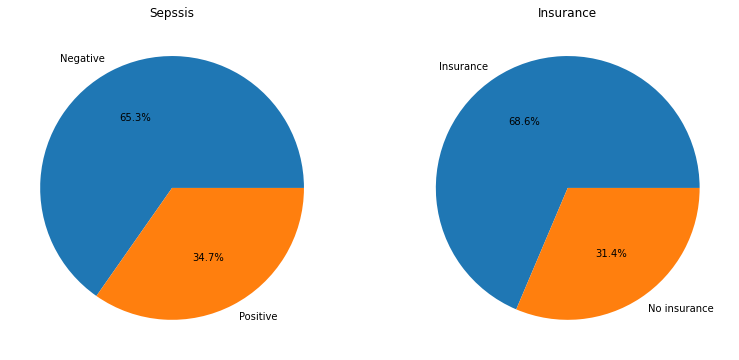

In [14]:
fig, ax = plt.subplots(1,2, figsize = (13, 13))

ax[0].pie(Training_Dataset.Sepssis.value_counts(), 
          labels = ["Negative", "Positive"], autopct='%1.1f%%')
ax[0].set_title("Sepssis")

ax[1].pie(Training_Dataset.Insurance.value_counts(), 
          labels = ["Insurance", "No insurance"], autopct='%1.1f%%')
ax[1].set_title("Insurance")


plt.show()

> <span style="font-size:1em;">✔</span> **Observations:** 
> <span style="font-size:1em;">   
    According to the previous pie charts, the number of people who have not developed Sepsis is lower than the number of people who have, and the number of people who have insurance is higher than the number of people who do not.

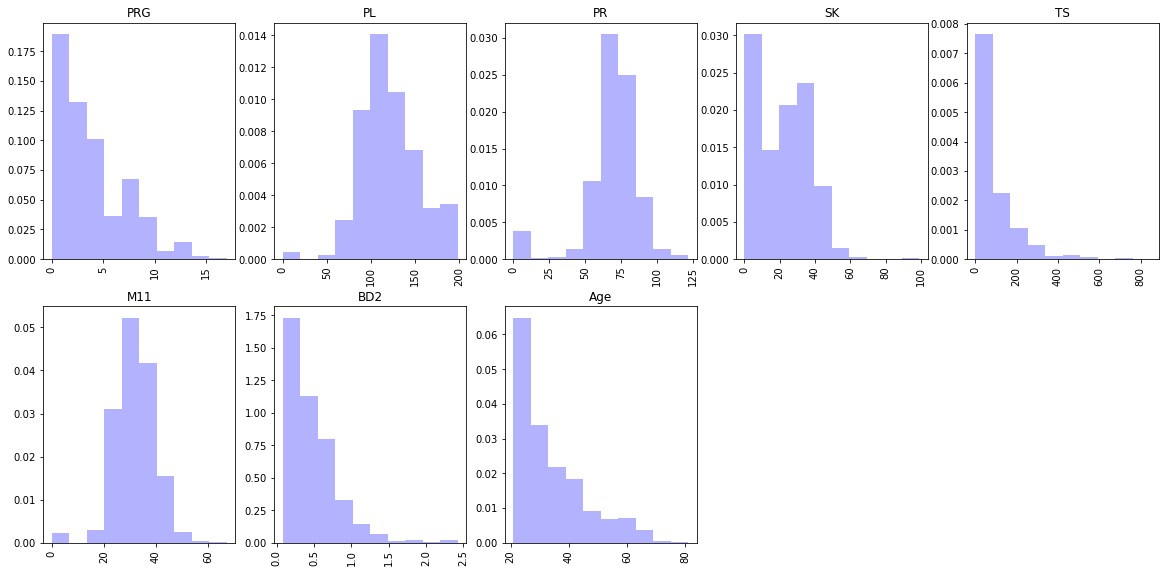

In [15]:
plt.figure(figsize=(20,20))
dd = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
for i, col in enumerate(dd):
    plt.subplot(4,5,i+1)
    plt.hist(Training_Dataset[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

> <span style="font-size:1em;">✔</span> **Observations:** 
> <span style="font-size:1em;">   
From the previous histograms, we can see many of the columns have outlliers such as PL, PR, SK M11, and TS, we will deal with them later before the modeling part. 
these histograms are a usefull tool in trems of representing the distribution of the data per each column, for exapmle, Age coloumn is skweed to right. So, the majority of the pations are approximately between 20 and 35 of age.  Plus, TS, PRG and BD2 are also skweed to the right as well. Furthermore,the rest have almost normal distribution only if we handle there outliers. Such as SK column, 0s are might be an outliers or missing data but if we handle it the data might have a better distribution. 
 

## Showing the relationship between all columns and target column 

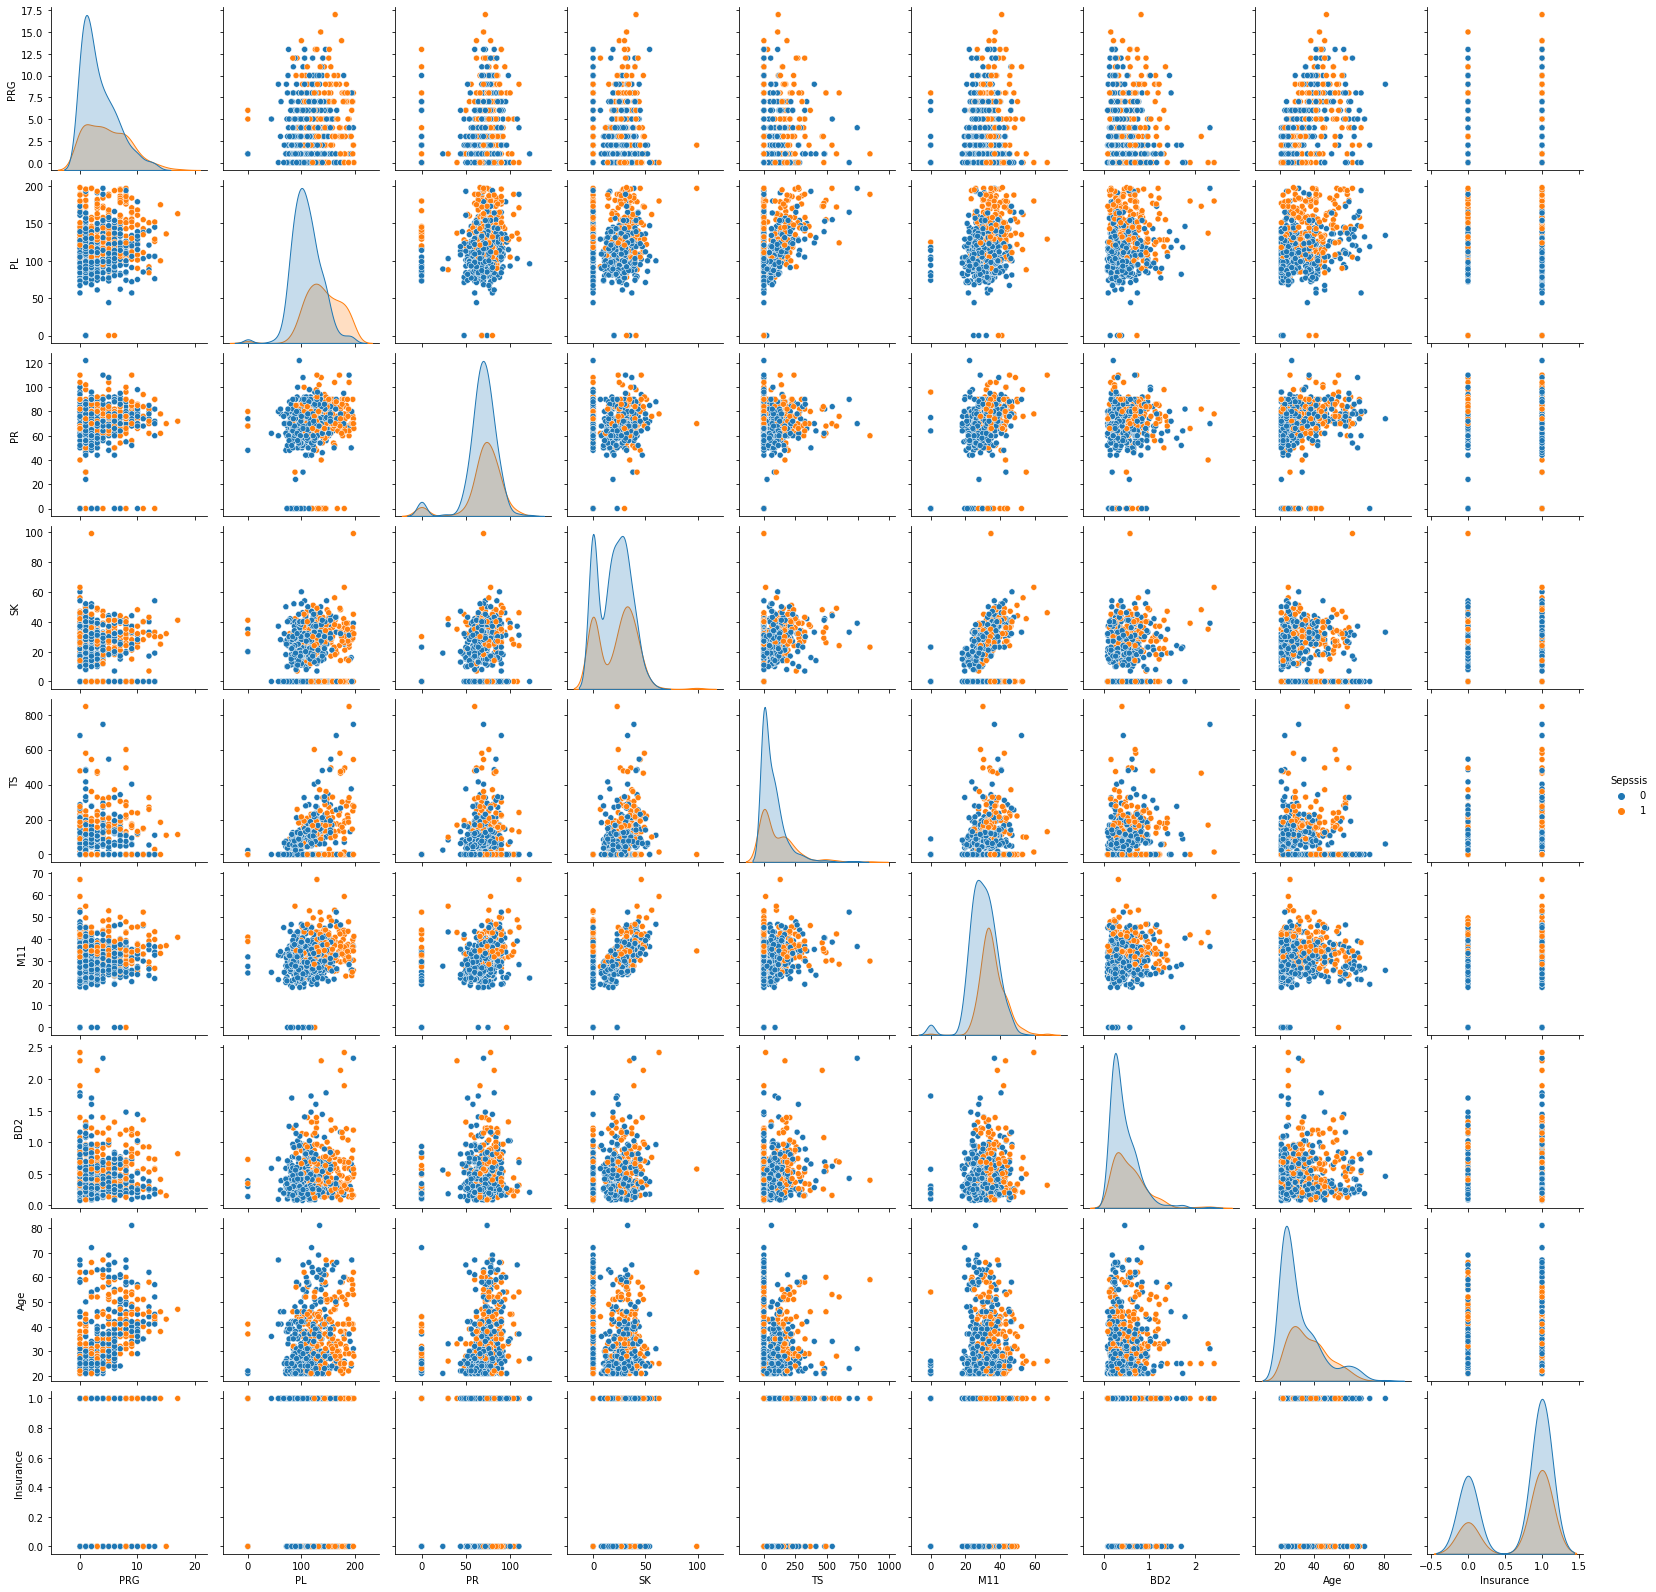

In [16]:
sns.pairplot(Training_Dataset, 
          hue = "Sepssis" # helps to separate the values by Sepssis
            );

> <span style="font-size:1em;">✔</span> **Observations:** 
> <span style="font-size:1em;">   
  > - Almost all of the plots illustrate that linear and non-linear decision boundaries may be inapplicable because the data points in both cases (0 and 1) are extremely close. The plots make it difficult to see a true relationship between the variables. As a result, the correlation map will be displayed, If we want to show how the columns are related. We can't truly understand the relationship between the target column and the other columns using a scatter plot because the points will just be classed as 0s and 1s, and they'll just look like an insurance column with no insight, but we can with a correlation plot.



## Correlation
The corrlation between columns is important in devoleping ML model, to see which columsn are related to  

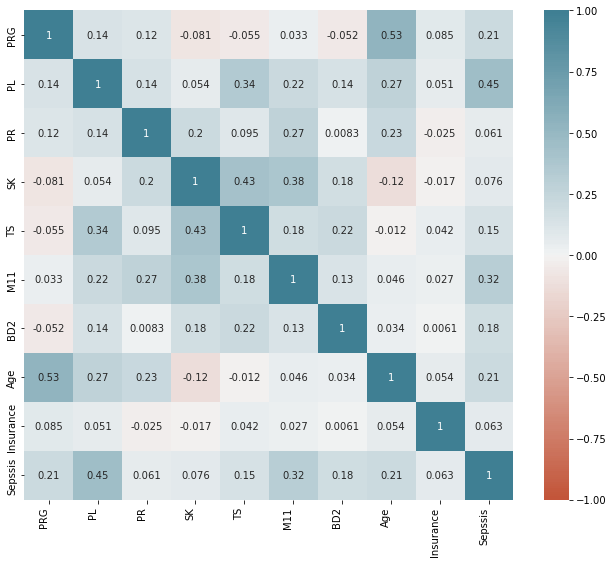

In [17]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
corr = Training_Dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
  
);

> <span style="font-size:1em;">✔</span> **Observations:** 
>Overall, the correlation are not that strong between all variables but we have spot some of good correlation, for example: 
> - Age has a positive correlation with the PRG variable. There is a 0.53 percent correlation between them.
> -The last row shows the correlation between each column in the dataset and the target column (Sepssis), from here we can see the most correlated column is PL at 0.45 percent, and the next column is M11 at 0.32 percent. 
>- ...

These insights help us in choosing the feartures for the model but the insurance column will not be selected as a feature for training the model scince it has low correlation with all other columns. 



## Outliers:

### Showing each column with boxplot:
Also, boxplot is useful in terms of showing the outliers clearly. 



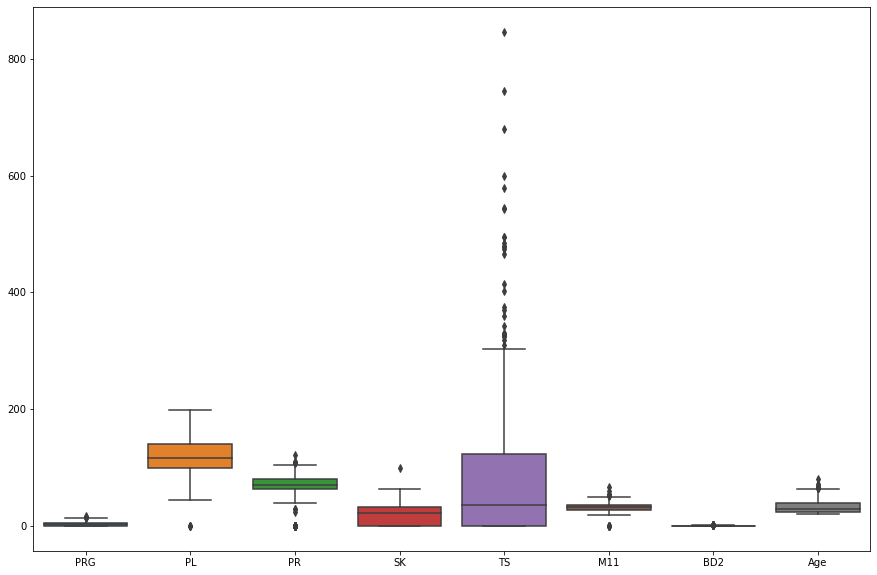

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
ax = sns.boxplot(data=Training_Dataset[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']])

## Handling outliers:
Outliers are handled in a variety of ways, depending on datasets and the goals of the project. For example, we don't know if the 0s in each column are outliers or not. Since, we do not know what the correct ranges are. However, outliers could be the right value for certain people's blood tests, ages and etc. So, replacing them with the mean or median may have a negative effect on the reliability of the data. However, in this case we have many 0s as minimum outliers, so we will replace them the minimum values of IQR, and other too far outliers will be replace with the Maximum values of IQR

In [19]:
out=['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
for x in out:
    q75,q25 = np.percentile(Training_Dataset.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Training_Dataset.loc[Training_Dataset[x] < min,x] = np.nan
    Training_Dataset.loc[Training_Dataset[x] > max,x] = np.nan

> IQR (Inter-Quartile-Range): The IQR describes the median 50% of values when ordered from lowest to highest. To calculate the interquartile range, find the median (middle value) of the lower and upper halves of the data (IQR). The values for quartile 1 (Q1) and quartile 3 (Q3) are shown below (Q3). The IQR is the difference between Q3 and Q1. After we've obtained the IQR value, we'll find the lowest and maximum whisker lengths. An outlier is a value that is outside the whiskers' range. The outliers will be turned to nulls, and the mean will be used to replace null.

In [20]:
Training_Dataset['PRG']=Training_Dataset.PRG.fillna(Training_Dataset.PRG.mean())
Training_Dataset['PL']=Training_Dataset.PL.fillna(Training_Dataset.PL.mean())
Training_Dataset['PR']=Training_Dataset.PR.fillna(Training_Dataset.PR.mean())
Training_Dataset['SK']=Training_Dataset.SK.fillna(Training_Dataset.SK.mean())
Training_Dataset['TS']=Training_Dataset.TS.fillna(Training_Dataset.TS.mean())
Training_Dataset['M11']=Training_Dataset.M11.fillna(Training_Dataset.M11.mean())
Training_Dataset['BD2']=Training_Dataset.BD2.fillna(Training_Dataset.BD2.mean())
Training_Dataset['Age']=Training_Dataset.Age.fillna(Training_Dataset.Age.mean())

> Replcaing Nulls with the mean, this is essentially, because null values will be an issue in scalling, moldeling stages and so on  

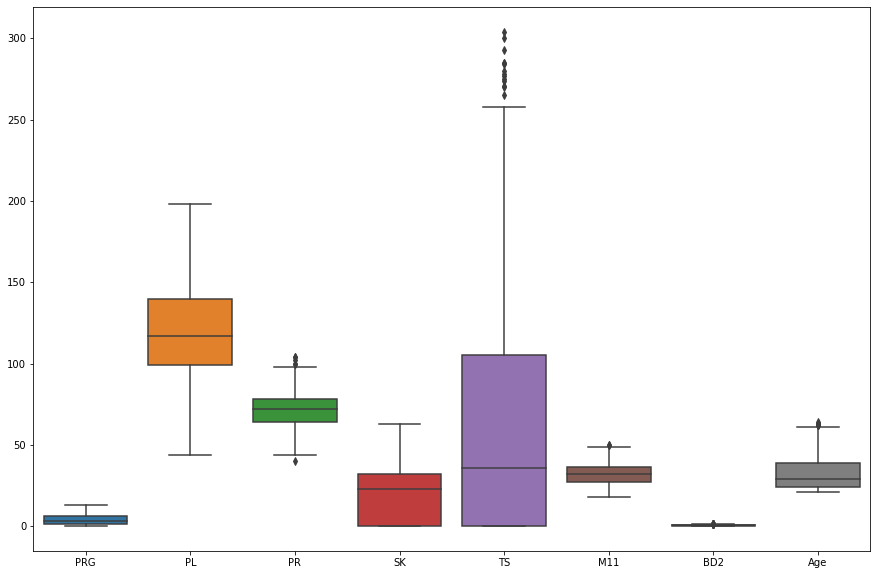

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
ax = sns.boxplot(data=Training_Dataset[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']])

We still had some outliers but that's fine, at least we handled the majority. In addition, models will handle them correctly, especially  decision tree and Random Forest. In real-world datasets, data providers would be more careful to provide data ranges etc, so in that case outliers will handle better. .

## Split data:
Here, we split the training dataset into three sets(training, train_data and validating datesets),train_data to train the model\train the hypothesis, val_data to simulate the performance of the model on unseen datasets (val_data simulates unseen data), in other words, for testing and tuniing parameters of the Algorithm. Test_data is out unseen data to evelute and compare the final hypothesis. 

Note, we are given the test dataset (Paitients_Files). However, here the testing is an additional step and just to see the capability of the models on unseen data before give the model the real unseen data as the asssigment requested. 

In [22]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data_, test_data = train_test_split(Training_Dataset, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(train_data_, test_size=0.25, 
                                            shuffle=True,random_state=0)

   
print(train_data.shape[0], val_data.shape[0], test_data.shape[0])

359 120 120


## Converting the data to np arrays:
Here, we are dropping the depentent freature (target column)from the indepentent features (the rest of the columns exapet th ID' and 'Insurance' freatures). The ID column is just an unique identifer and the Insurance just Showing that if a patient has an insurance or not 

In [23]:
train_X = train_data.drop(['Sepssis','ID','Insurance'], axis=1).to_numpy()
train_y = train_data[['Sepssis']].to_numpy()

val_X = val_data.drop(['Sepssis','ID','Insurance'], axis=1).to_numpy()
val_y = val_data[['Sepssis']].to_numpy()

test_X = test_data.drop(['Sepssis','ID','Insurance'], axis=1).to_numpy()
test_y = test_data[['Sepssis']].to_numpy()



### seting up the functions to get the performance.

In [24]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1

### Scalling the features for the models:

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly.fit(train_X)
train_X = poly.transform(train_X)
test_X = poly.transform(test_X)
val_X = poly.transform(val_X)

The logistic regression model, in general, responds well to polynomial input variables. However, it is critical to scale the features using normalisation or standardisation following this step. We employ standardisation in our case since it improves model accuracy.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)


## Modeling:
Here, we will be using three Classification models, 
> - LogisticRegression
> - DecisionTreeClassifier
> - Random Forest

Based on their outcomes. We will use one of them to predict for the unseen data (Testing_Dataset)

### Logistic Regression Model:

A brief explanation of why this model was chosen: it is quick and simple to implement, and it is effective at training and classifying unknown classes. Also, no assumptions about distribution classes are made. give high accuracy for a many number of samples and are effective for determining the linearity of dependent and independent features. It's also capable of interpreting model coefficients as indicators of feature relevance. [1] 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

LR = LogisticRegression(solver='liblinear', random_state=0).fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(LR, train_X, train_y, val_X, val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

# MSE, measuring the percent of error, the lower is better, 0 means the model is perfect or might over-fitted 
predictions = LR.predict(test_X)
m= mean_squared_error(test_y, predictions)
print("Mean Squared Error is: {:.3f}".format(m))

Train F1-Score score: 0.798
Validation F1-Score score: 0.730
Mean Squared Error is: 0.308


The baseline model performed exceptionally well in training, scoring 0.79, but only 0.73 in validation. We must fix the gap between training and validating. This is referred to as (generalisation GAP). To narrow the difference between the two performances, we'll use regularisation.

In [28]:
lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    LR = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced').fit(train_X, train_y.ravel())
    
    train_f1, val_f1 = get_f1_scores(LR, train_X, train_y, val_X, val_y)
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

Let's see the training and validation results for each lambda value.

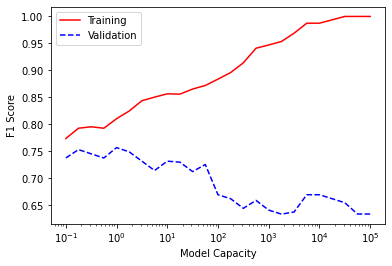

In [29]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

In [30]:
LR = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced').fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(LR, train_X, train_y, val_X, val_y)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

predictions = LR.predict(test_X)
MSE= mean_squared_error(test_y, predictions)
print("Mean Squared Error is: {:.3f}".format(MSE))

Train F1-Score score: 0.774
Validation F1-Score score: 0.738
Mean Squared Error is: 0.258


Not the best performance, but still better than the previous one, at least we colsed the gap a little bit. Plus the MSE is lower which means less errors.   

### Testing the hypothesis (LogisticRegression model):

In [31]:
from sklearn.metrics import classification_report
test_pred = LR.predict(test_X)

    
print(classification_report(test_y, test_pred,))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        75
           1       0.63      0.76      0.69        45

    accuracy                           0.74       120
   macro avg       0.73      0.74      0.73       120
weighted avg       0.76      0.74      0.75       120



> <span style="font-size:1em;">✔</span> **Observations:**    
> Overall, the measurements are good; the accuracy is 0.74, which isn't the best, but it's better than our expectations; at the very least, the model isn't overfitting or underfitting. The probability of correctly predicting negative cases is high, at 0.83. The positive cases, on the other hand, have a lower score of 0.63. 


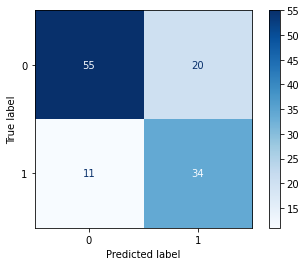

(None,)

In [32]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(LR, test_X, test_y,
                                 cmap=plt.cm.Blues)
plt.show(),

> <span style="font-size:1em;">✔</span> **Observations:**    
> Overall, the model did well in predicting the values(0s and 1s). As the confusion_matrix shows, The model correctly predicted the 0s (negative) in 55 cases where the actual value was 0, but not in 20 cases where the actual value was 1 (positive), and so on.

## K-Fold Cross Validation (Logistic Regression Model):
This step is only for further validation of the models, we will do this on logistic and random forest models to decide which one will be selected as the best model. The decision tree algorithm will not be checked because it gave us the lowest accuracy. (This was added after checking the accuracy)

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=100, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_y.ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

/Users/rehamabdullah/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/rehamabdullah/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/rehamabdullah/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/rehamabdullah/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/rehamabdullah/opt/anaconda3/lib/python3.9/site-packages/sklearn/s

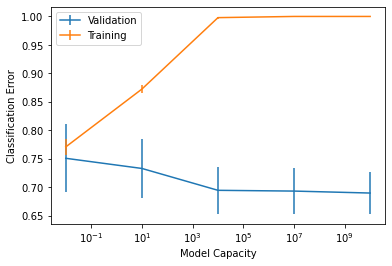

In [34]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

The graph shows a gap between training and validation but it's not bad, especially since some points or means are close and lie between 0.80 and 0.75

####  Logistic Regression Model's limitations:
The assumption of linearity between dependent and independent values is the model's fundamental limitation. The association between the factors was shown in the previous plot. Because the variables are separated by 1 and 0, we noticed that there is no linearity. As a result, the accuracy and prediction, among other things, may be affected. In other words, because logistic regression has a linear decision surface, it is difficult to solve non-linear problems with it. Furthermore, linearity is uncommon in real world scenarios. However, we have achieved high accuracy thus far, and we expect this to improve with the inclusion of additional models.

###  Decision Tree Classifier Model:

We chose this model because it takes less time to prepare the data during pre-processing, and there are no requirements for normalization or minimization (we may apply it for better performance). Moreover, missing values can be handled very well with this model

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


DecisionTreeClassifier = tree.DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier.fit(train_X, train_y)

train_f1, val_f1 = get_f1_scores(DecisionTreeClassifier, train_X, train_y, val_X, val_y)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))


predictions = DecisionTreeClassifier.predict(test_X)
MSE = mean_squared_error(test_y, predictions)
print("Mean Squared Error is: {:.3f}".format(MSE))

Train F1-Score score: 1.000
Validation F1-Score score: 0.575
Mean Squared Error is: 0.308


> <span style="font-size:1em;">✔</span> **Observations:** 
> 100% score training accuracy means the model is overfitting; MSE isn't great, but we'll attempt to reduce it; the generalisation gap between training and validation is huge; we'll try to tune the hyper parameters.

## Hyper parameter tuning: 
to get better Performance, we will tune  `max_depth` and `min_samples_split`.

In [36]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,400, 50), 'min_samples_split':np.arange(2,50,5)}

DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(DecisionTreeClassifier, parameters, scoring='f1_macro')
Gridclf.fit(train_X, train_y)
train_acc, val_acc = get_f1_scores(Gridclf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

predictions = Gridclf.predict(test_X)
MSE = mean_squared_error(test_y, predictions)
print("Mean Squared Error is: {:.3f}".format(MSE))

Train f1 score: 0.763
Validation f1 score: 0.690
Mean Squared Error is: 0.292


> <span style="font-size:1em;">✔</span> **Observations:** 
> We got a better performance in training and validation. Also, MSE . has been reduced

#### Attempting to seek better performance by implementing cost complexity pruning
min_samples_leaf and max_depth prevent the tree from overfitting  but they may prevent the tree from growing and taking large samples, with the help of cost_complexity_pruning we may achieve better performance while trying to allow the tree to grow

In [37]:
clf = tree.DecisionTreeClassifier(class_weight='balanced')
path = clf.cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [38]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(train_X, train_y)
    clfs.append(clf)

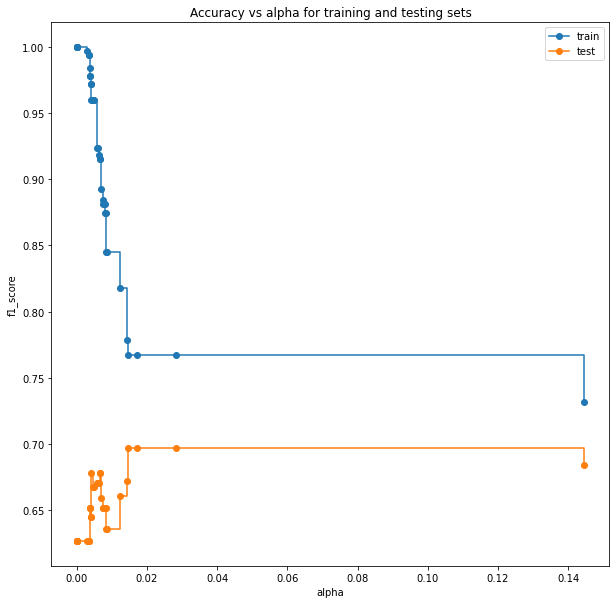

In [39]:
train_scores = [f1_score(train_y, clf.predict(train_X), average='macro') for clf in clfs]
val_scores = [f1_score(val_y, clf.predict(val_X), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


>From the graph, it appears that we have a gap between training performance and validation. Lets check the acutal numbers 

In [40]:
train_acc, val_acc = get_f1_scores(clf,train_X, train_y, val_X, val_y)
print("Train f1 score: {:.3f}".format(train_acc))
print("Validation f1 score: {:.3f}".format(val_acc))

predictions = clf.predict(test_X)
MSE = mean_squared_error(test_y, predictions)
print("Mean Squared Error is: {:.3f}".format(MSE))

Train f1 score: 0.731
Validation f1 score: 0.684
Mean Squared Error is: 0.308



> We got a less performance in training and validation. Also, MSE value has been incread. Thus, After tuning the models many times we will use the one we tuned with GridSearchCV who gave us the best traning and validation scores and less MSE

### Testing the hypothesis (DecisionTreeClassifier model): 
 

In [41]:
from sklearn.metrics import classification_report
test_pred = Gridclf.predict(test_X)
    
print(classification_report(test_y, test_pred,))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76        75
           1       0.60      0.69      0.64        45

    accuracy                           0.71       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.72      0.71      0.71       120



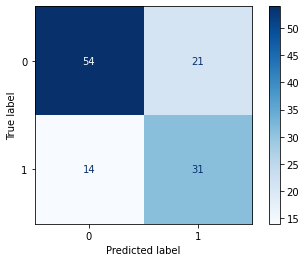

In [42]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(Gridclf, test_X, test_y,
                                 cmap=plt.cm.Blues)
plt.show()


> <span style="font-size:1em;">✔</span> **Observations:**    
> Overall, the model did well in predicting the values(0s and 1s). As the confusion_matrix shows, The model correctly predicted the 0s (negative) in 54 cases where the actual value was 0, but not in 21 cases where the actual value was 1 (positive), and so on.


#### Decision Tree Classifier Model's limitations:
Any change in the data might have a significant impact on the model's structure, resulting in model instability.
When compared to other algorithms, decision tree calculations take longer and are more complex.
Lacking an understanding of the tree's size or preventing the tree from growing to train more nodes has a significant influence on performance.

### Random Forest Classifier model:
The Random Forest model was chosen because it can address both classification and regression problems. There is no need to scale features, and it can handle missing data well. Intuitive in dealing with outliers. can efficiently handle non-linear variables

In [43]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(RF, train_X, train_y, val_X, val_y)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

predictions = RF.predict(test_X)
MSE = mean_squared_error(test_y, predictions)
print("Mean Squared Error is: {:.3f}".format(MSE))

Train F1-Score score: 1.000
Validation F1-Score score: 0.733
Mean Squared Error is: 0.242


> As we explained before, 100% score training accuracy means the model is overfitting; MSE isn't that bad, but we'll reduce it; the generalisation gap between training and validation is big; Tune the hyper parameters is necessary.

### Fitting & Tuning RandomForestClassifier:
We have tuned the RandomForestClassifier with their parameters to find the optimal as follows:

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF =RandomForestClassifier(max_depth=5, n_estimators=500, class_weight='balanced_subsample', random_state=0)

RF.fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(RF, train_X, train_y, val_X, val_y)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

predictions = RF.predict(test_X)
MSE = mean_squared_error(test_y, predictions)
print("Mean Squared Error is: {:.3f}".format(MSE))

Train F1-Score score: 0.882
Validation F1-Score score: 0.728
Mean Squared Error is: 0.258



> After tuning the Random Forest model, we got a good performance in training but not in validation (Overfitting). Besides, there is still a large generalization gap between them. Also, The MSE value is reasonable .

### Testing the hypothesis (Random Forest Classifier model)

In [45]:
from sklearn.metrics import classification_report
test_pred = RF.predict(test_X)

    
print(classification_report(test_y, test_pred,))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        75
           1       0.63      0.76      0.69        45

    accuracy                           0.74       120
   macro avg       0.73      0.74      0.73       120
weighted avg       0.76      0.74      0.75       120



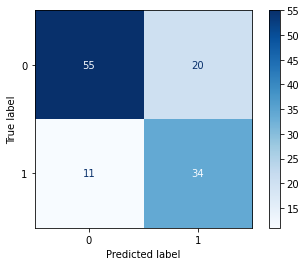

In [46]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(RF, test_X, test_y,
                                 cmap=plt.cm.Blues)
plt.show()


> <span style="font-size:1em;">✔</span> **Observations:**    
> Overall, the model did well in predicting the values(0s and 1s). As the confusion_matrix shows, The model correctly predicted the 0s (negative) in 55 cases where the actual value was 0, but not in 20 cases where the actual value was 1 (positive), and so on.

#### Random Forest Classifier model's limitations:
The model's drawbacks include its complexity, which stems from the fact that it generates a large number of trees using the Python sklearn module, as well as the fact that it takes a longer time to train than a decision tree (that was noticed when I was a model training for this job). Also, it requires more resources to tune and implement. (This is one of the main challenges I see with this project is tuning this model for best performance.)

## K-Fold Cross Validation (Random Forest Classifier):
This step is only for further validation of the models, we will do this on logistic and random forest models to decide which one will be selected as the best model. The decision tree algorithm will not be checked because it gave us the lowest accuracy. 

In [47]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    RF =RandomForestClassifier(max_depth=8, n_estimators=500, class_weight='balanced_subsample', random_state=0)

    
    scores = cross_validate(RF, train_X, train_y.ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores



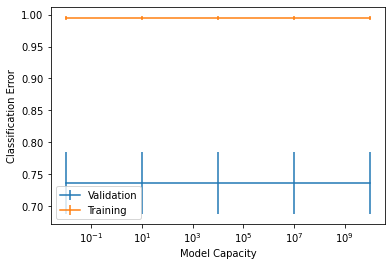

In [48]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

From the graph, it is clearly the model is clearly overfitting, even thought, this model is perfect at avoiding overfitting.

### Prediction:
For the ultimate decision on which algorithm to utilise in a real-world scenario, I would strongly recommend Random Forest model, based on the fact that it is robust in dealing with regression and classification difficulties. Missing and outlier values will also be dealt with automatically. Additionally, the capacity to make better forecasts than decision tree model. In addition, unlike other models, Random forest solves the problem of overfitting. It can also easily handle big datasets. Although, this model requires more resources and time to be implemented but for better performance accuracy these two points will not be a big deal. However, unfortunately, in our case the model is clearly overfitted. So, It will not be chosen to predict unseen data

So, in our task and based on the results, Logistics regression model performed the best in terms of achieving  high accuracy and less generalisation gap. Thus, it will be using to predict the result of the test dataset. However, given that this algorithm is not ideal for the distribution of our data as it requires a decision boundary for a binary classification problem. But looking at the results made me think it was the best.

In [49]:
Testing_Dataset.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


#### Droping ID column and Insurance as we did in the training dataset.

In [50]:
X_test = Testing_Dataset.drop(['ID','Insurance'], axis=1).to_numpy()

#### Checking the shape: 

In [51]:
X_test.shape

(169, 8)

### We have to scale the features as we did with the model during the training and validation...

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly.fit(X_test)
X_test = poly.transform(X_test)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

#### Checking the shape after  scalling: 

In [54]:
X_test.shape

(169, 165)

### predicting with Logistics regression: 

In [55]:
test_pred = LR.predict(X_test)
test_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [56]:
# convert t
ID = Testing_Dataset[['ID']]
# convert the array into dataframe 
Sepssis = pd.DataFrame(test_pred)
# replacing 1s and 0s with Positive and Negative
Sepssis = Sepssis.replace(1,'Positive')
Sepssis = Sepssis.replace(0,'Negative')
Sepssis.head(5)


,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


### Merging the columns

In [57]:
predicted_dataset = ID.merge(Sepssis, left_index=True, right_index=True)
predicted_dataset.head(3)

,ID,0
0,ICU200609,Negative
1,ICU200610,Negative
2,ICU200611,Negative


### Rename the columns:

In [58]:
# Rename the columns 
predicted_dataset= predicted_dataset.rename(columns={0: "Sepssis"})
predicted_dataset.head(3)


,ID,Sepssis
0,ICU200609,Negative
1,ICU200610,Negative
2,ICU200611,Negative


### Setting ID column as an index

In [59]:
predicted_dataset=predicted_dataset.set_index('ID')

### Saving the dataframe as CSV file 

In [60]:
predicted_dataset.to_csv('S3805747_predictions.csv')

### Reference list:

[1] Rout, A. R. (2020, September 2). Advantages and disadvantages of logistic regression. GeeksforGeeks. Retrieved April 11, 2022, from https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/#:~:text=The%20major%20limitation%20of%20Logistic,association%20(positive%20or%20negative) 
[2] Kim, H. (2021, November 22). Random Forest from modelbuilding to hyperparameter tuning in python. Medium. Retrieved April 11, 2022, from https://medium.com/swlh/random-forest-from-model-building-to-hyperparameter-tuning-in-python-5d0c07a428eb 